### Using a decision tree to classify the quality of wine based on its composition

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [22]:
df = pd.read_csv('./wine.csv')

In [23]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


#### Encoding the categorical data from the 'quality' column using Label Encoder; 0 represents "bad" while 1 represents "good"

In [25]:
from sklearn.preprocessing import LabelEncoder
quality_le = LabelEncoder()

In [26]:
df['quality'] = quality_le.fit_transform(df['quality'])

In [27]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


#### 'inputs' represents the independent variables while 'target' represents the dependent variables

In [9]:
inputs = df.drop(columns=['quality'])
target = df['quality']

#### splitting the data into testing and training sets

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(inputs,target, test_size=0.2, random_state=0)

#### The Decision Tree

In [16]:
from sklearn import tree
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

#### The Decision Tree's score

In [28]:
model.score(X_test,y_test)

0.778125

In [29]:
y_predicted = model.predict(X_test)

#### Visualizing the Decision tree's performance by using a confusion matrix

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_predicted,y_test)

Text(42.0, 0.5, 'Predicted-values')

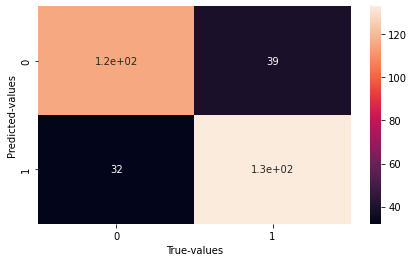

In [20]:
plt.figure(figsize=(7,4))
sns.heatmap(cm, annot=True)
plt.xlabel('True-values')
plt.ylabel('Predicted-values')